In [4]:
#Importing libraries for data preprocessing & EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [6]:
#Reading the dataset from the .csv file
df_loan = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [7]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<h2>Read the column description and ensure you understand each attribute well<h2>

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df_loan.shape

(5000, 14)

In [10]:
#There are outliers in income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,CreditCard
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
#There are no values in dataset , so we don't need to worry about imputation 
df_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

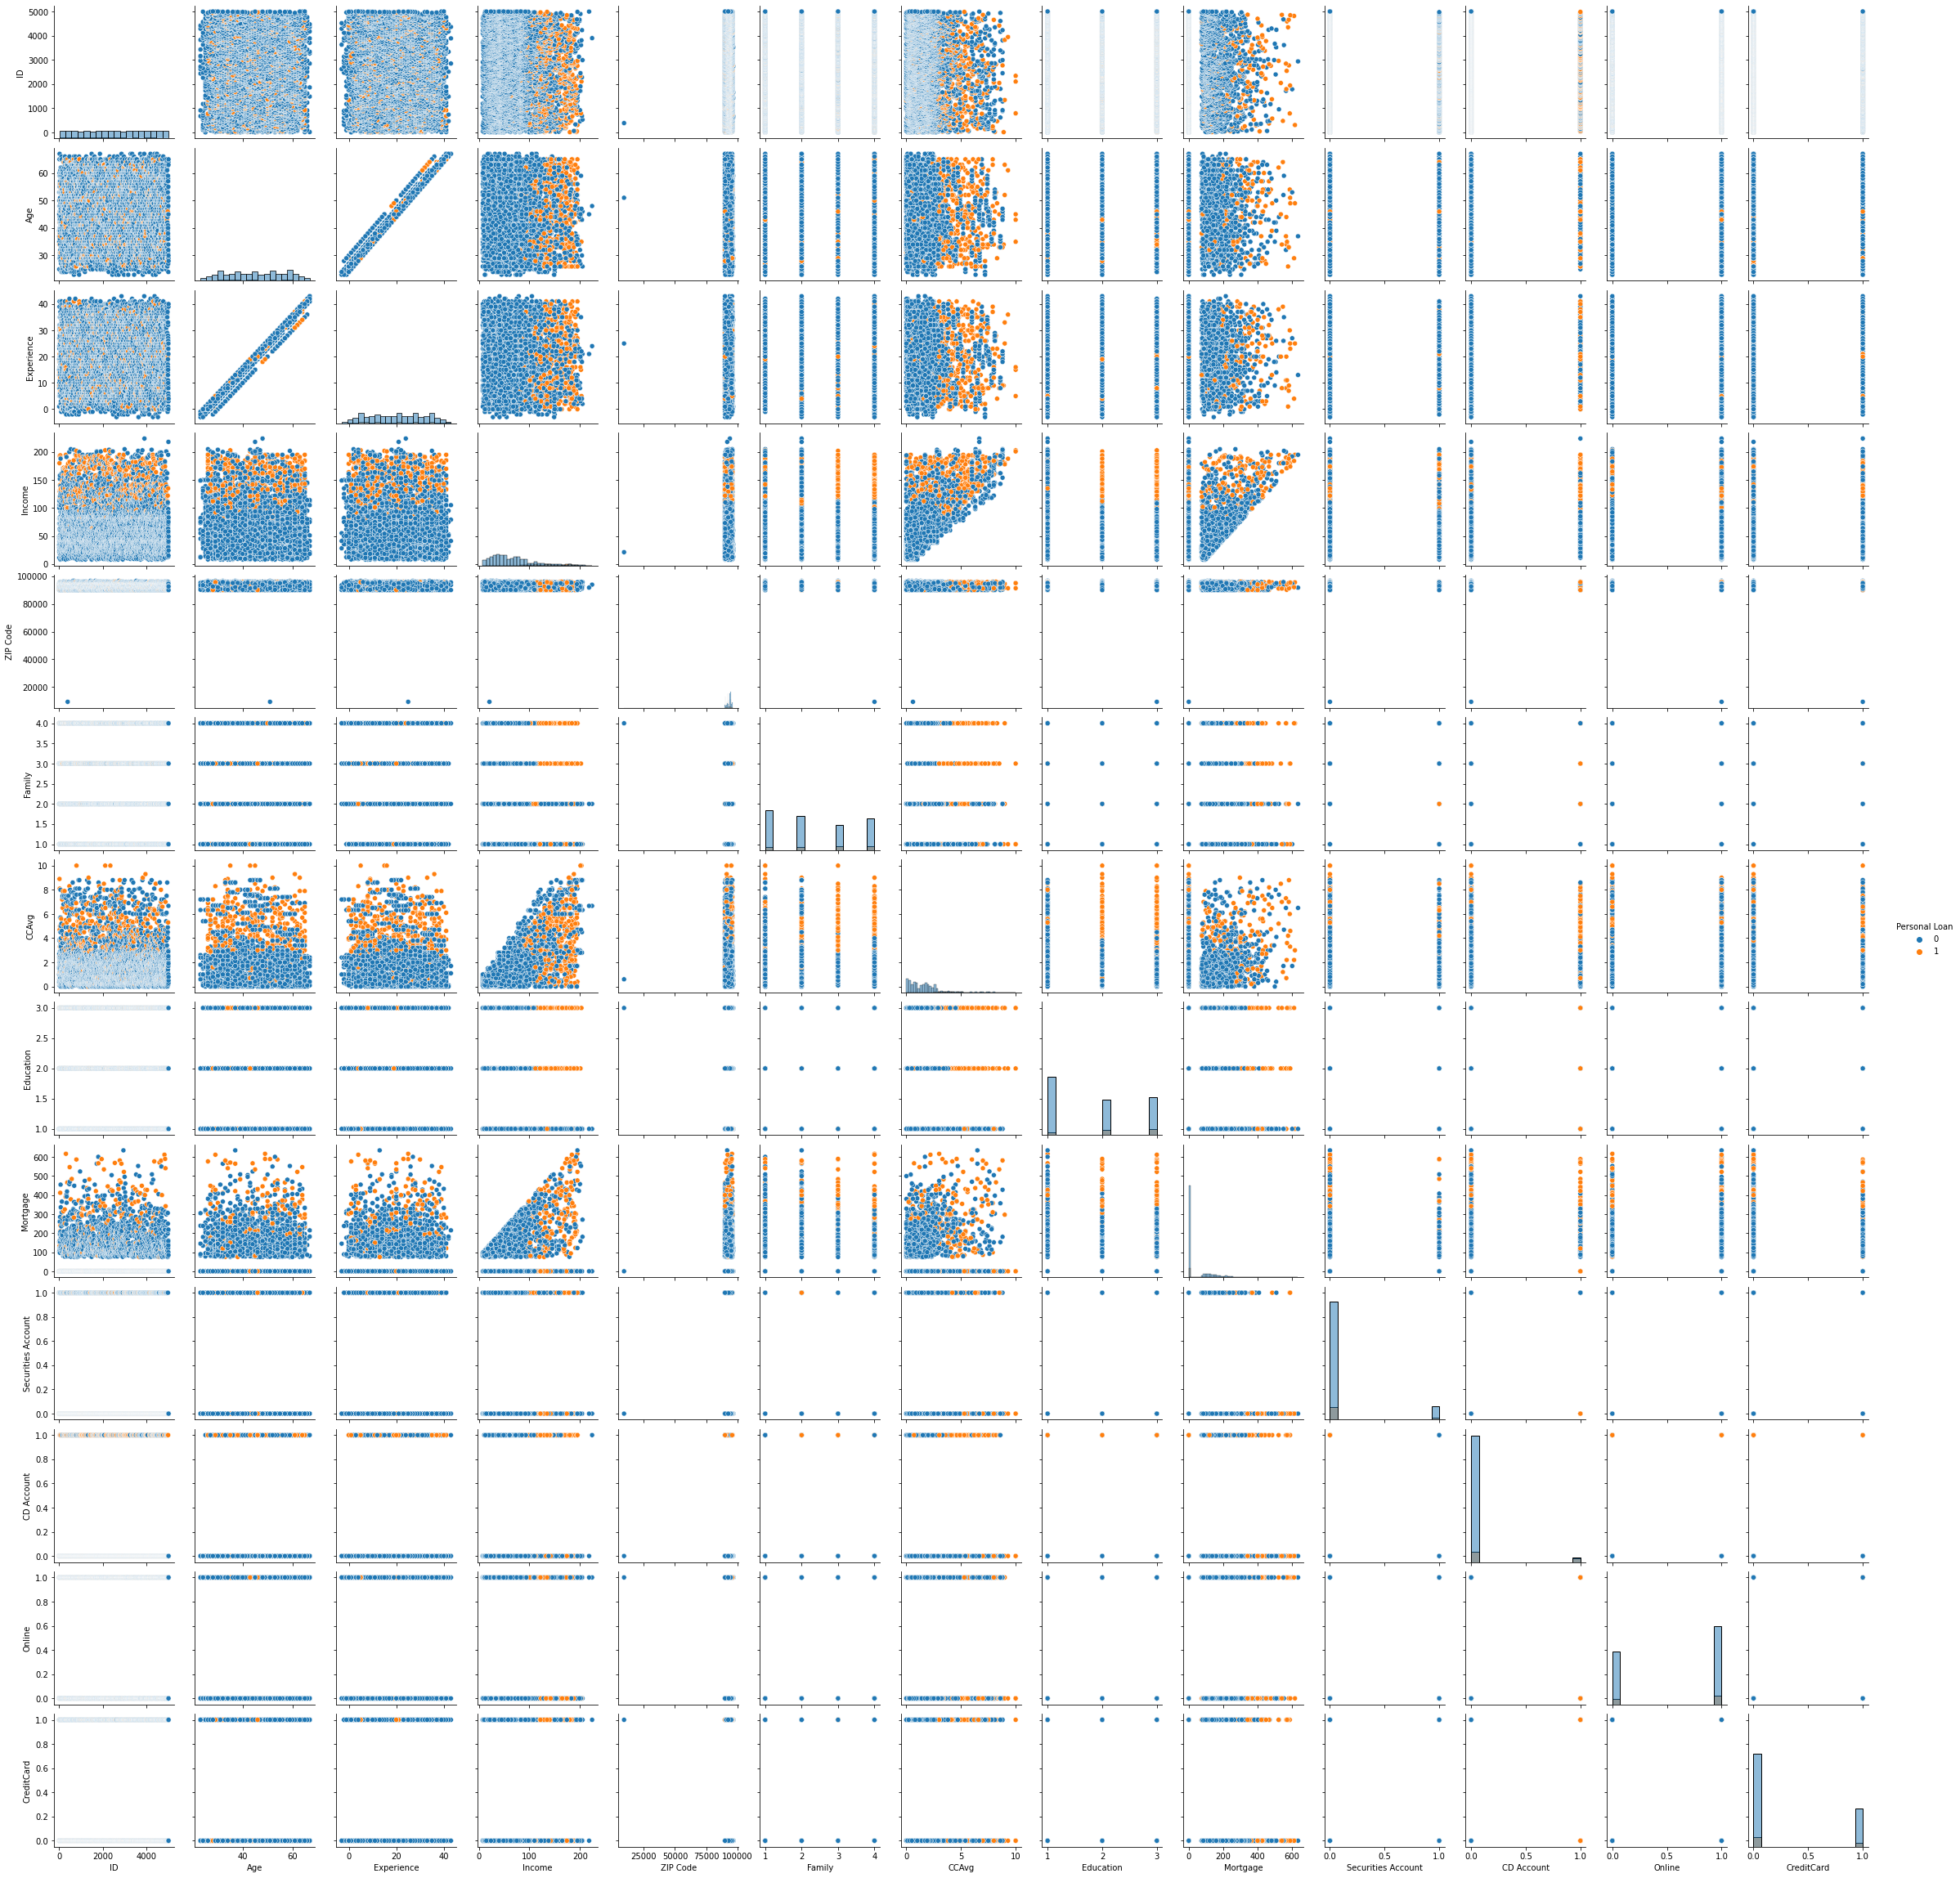

In [12]:
sns.pairplot(df_loan,diag_kind='hist',hue='Personal Loan')

In [13]:
df_loan.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [14]:
df_loan.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

Negative skewed columns(Left Skewed) : Age,Experience,ZIP Code,Online

Positive skewed columns(Right Skewed) : Income,family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Credit Card
    
We can find the skewness is highest in Zip Code followed by CD Account,Personal Loan,Securities Account,Mortgage and CCAvg.

<h4><u>Information on the features or attributes:-</u>

There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.


<u>The binary category have five variables as below:</u>

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable

Securities Account - Does the customer have a securities account with the bank?

CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

Online - Does the customer use internet banking facilities?

Credit Card - Does the customer use a credit card issued by UniversalBank?


<u>Interval variables are as below:</u>

Age - Age of the customer

Experience - Years of experience

Income - Annual income in dollars

CCAvg - Average credit card spending

Mortage - Value of House Mortgage


<u>Ordinal Categorical Variables are:</u>

Family - Family size of the customer

Education - education level of the customer


<u>The nominal variable is :</u>

ID

Zip Code </h4>

<h2>Study the data distribution in each attribute, share your findings<h2>

<h3>Univariate Analysis</h3>

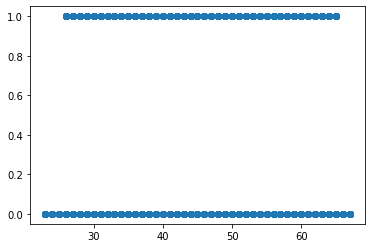

In [15]:
#The range for age who opted for personal loan is less compared to ones who have not.
#The age group of customers opting for loan is between 25-65 years
plt.scatter(df_loan['Age'],df_loan['Personal Loan'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

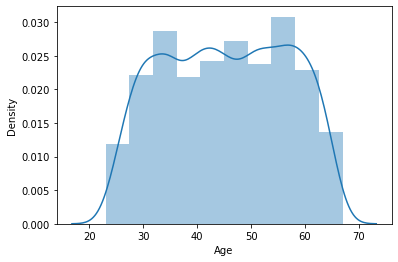

In [16]:
#Almost follows normal distribution. 
sns.distplot(df_loan['Age'],kde=True,bins=10)

(array([ 802., 1153.,  867.,  879.,  377.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <BarContainer object of 10 artists>)

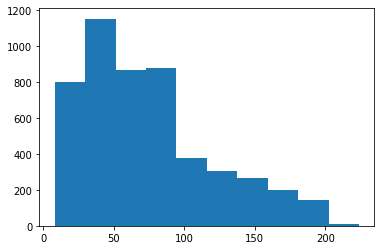

In [17]:
#The distribution for income of the customers is slightly right skewed. The range of income is between 8$-224$
plt.hist(df_loan['Income'])

<AxesSubplot:ylabel='Density'>

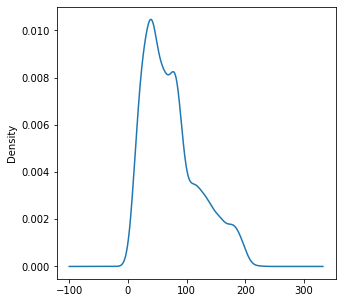

In [18]:
plt.figure(figsize=(5,5))
df_loan['Income'].plot(kind='density')

<AxesSubplot:ylabel='Income'>

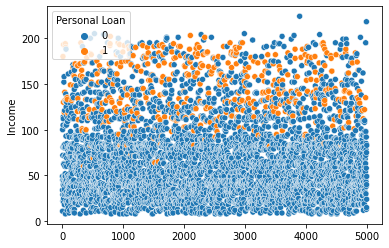

In [19]:
#The low income group have not opted for personal loan (<100$) whereas density for the liability customers is more in higher income group.
sns.scatterplot(df_loan.index,df_loan['Income'],hue=df_loan['Personal Loan'])

Text(0, 0.5, 'ZIP Code')

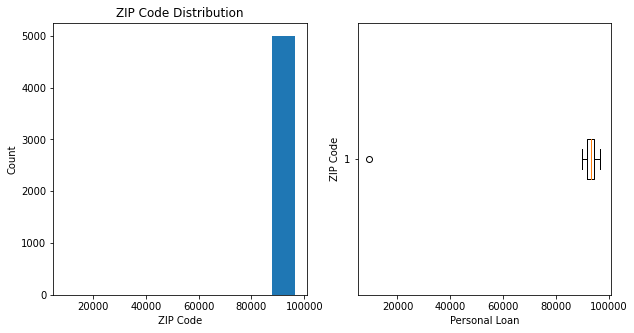

In [20]:
#The distribution shows the max zip code are from range 90k-100k.
#But there is one value of zip code,which can be considered as outlier.

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('ZIP Code')
ax1.set_ylabel('Count')
ax1.set_title("ZIP Code Distribution")
plt.hist(df_loan['ZIP Code'])

ax2 = fig.add_subplot(122)
plt.boxplot(df_loan['ZIP Code'],vert=False)
ax2.set_xlabel('Personal Loan')
ax2.set_ylabel('ZIP Code')

4    134
3    133
1    107
2    106
Name: Family, dtype: int64

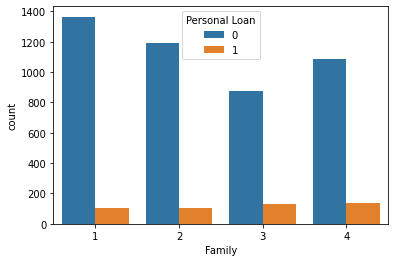

In [21]:
#Customer with family of 4 members have higher chances of opting for personal loan. 
sns.countplot(df_loan['Family'],hue=df_loan['Personal Loan'])
df_loan[df_loan['Personal Loan']==1]['Family'].value_counts()

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

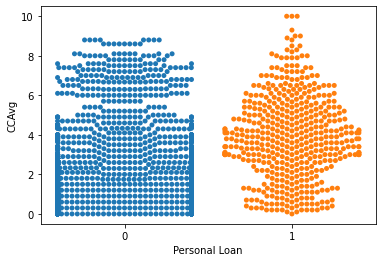

In [22]:
#The avg CC spending  of the customers who have not opted for personal loan is high in 0-5$ range whereas its high for people 
#opting for personal loan in 3-5$ range. The distribution tapers towards higher CC spending and 
# asset customers spend upto 10$ compared to liability customers
sns.swarmplot(df_loan['Personal Loan'],df_loan['CCAvg'])

3    205
2    182
1     93
Name: Education, dtype: int64

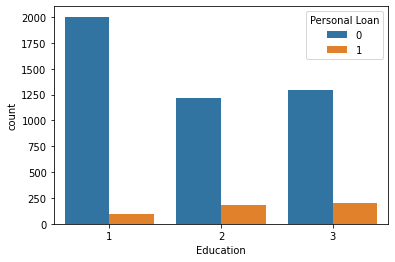

In [23]:
#Count of liability customers who are undergraduate is more compared to rest of graduates. 
#Although, the count of customers, who are post graduate and who have applied for personal loan is more compared to 
#rest of the graduates. This shows education can impact outcome of customers opting for personal loan
sns.countplot(df_loan['Education'],hue=df_loan['Personal Loan'])
df_loan[df_loan['Personal Loan']==1]['Education'].value_counts()

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

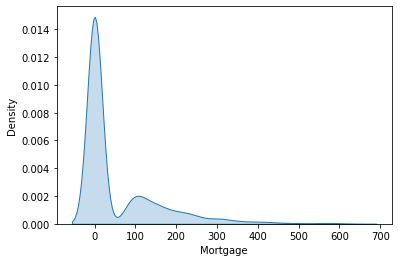

In [24]:
#Mortgage is mostly null in most of the customers, although there is certain spike between 100$-300$ for some customers
sns.kdeplot(df_loan['Mortgage'],shade=True,kernel='gau')

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <BarContainer object of 10 artists>)

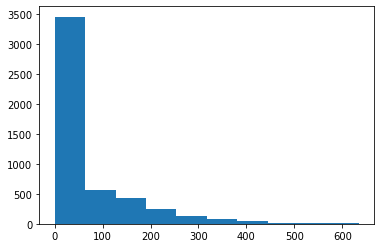

In [25]:
plt.hist(df_loan['Mortgage'])

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

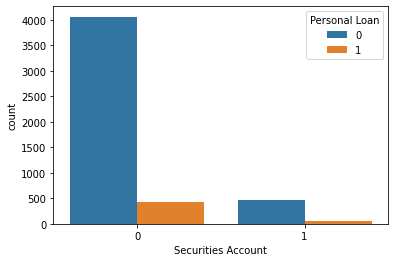

In [26]:
#The liability customers seem to have no security account with the bank and still have opted for more personal loan 
#comapred to asset customers
sns.countplot(df_loan['Securities Account'],hue=df_loan['Personal Loan'])

<AxesSubplot:xlabel='CD Account', ylabel='count'>

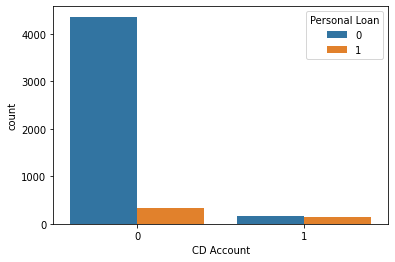

In [27]:
#Customers with Certificate of deposit opting for personal loan is less compared to customers with no CD.
sns.countplot(df_loan['CD Account'],hue=df_loan['Personal Loan'])

<AxesSubplot:xlabel='Online', ylabel='count'>

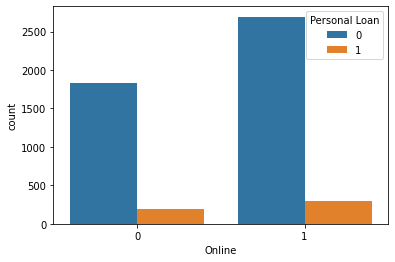

In [28]:
#Customers with online netbanking facility have more chances of opting for personal loan
sns.countplot(df_loan['Online'],hue=df_loan['Personal Loan'])

<h1>Bivariate Analysis</h1>

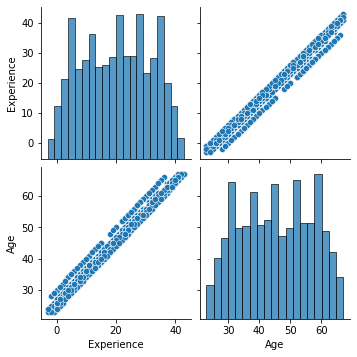

In [29]:
#Experience has a strong linear relationship with Age.
sns.pairplot(df_loan, vars=["Experience", "Age"])

In [30]:
#Total we have 52 negtive values in the experince column. We need to handle this case by 2 ways.
df_loan[df_loan['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

<h3> There are some negative values in the "Experience" column, which is causing irregularity. 
So these negative values must be handled either by setting it to 0 or by replacing them with median values. </h3>

In [31]:
df_test = df_loan.copy()

In [32]:
#1. Let's try imputing with 0 and see if there is any change in the behavior of Experience column
df_test['Experience'] = np.where(df_test['Experience'] < 0, 0, df_test['Experience'])

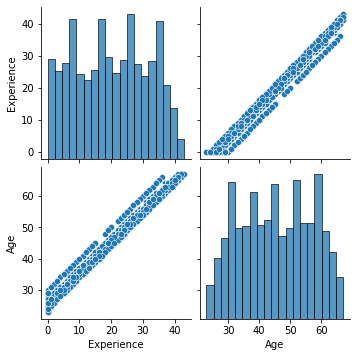

In [33]:
sns.pairplot(df_test, vars=["Experience", "Age"])

In [34]:
df_test1 = df_loan.copy()

In [35]:
#df_test1['Experience'] = np.where(df_test1['Experience'] < 0, df_test1['Experience'].median, df_test1['Experience'])
df_test1['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
df_test1['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
df_test1['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [36]:
#Let's try imputing based on the median values
df_test1['Experience'].fillna(df_test1['Experience'].median(),inplace=True)

In [37]:
# df_Positive_Experience = df_loan[df_loan['Experience'] > 0]
# df_Negative_Experience =  df_loan[df_loan['Experience'] < 0]
# df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

# for id in df_Negative_Experience_List:
#     age_values =df_loan.loc[np.where(df_loan['ID']==id)]["Age"].tolist()[0]
#     education_values = df_loan.loc[np.where(df_loan['ID']==id)]["Education"].tolist()[0]
#     positive_Experience_Filtered = df_Positive_Experience[(df_Positive_Experience['Age'] == age_values) & (df_Positive_Experience['Education'] == education_values)]
#     if positive_Experience_Filtered.empty :
#         negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) & (df_Negative_Experience['Education'] == education_values)]
#         exp = round(negative_Experience_Filtered['Experience'].median())
#     else:
#         exp = round(positive_Experience_Filtered['Experience'].median())
#     df_loan.loc[df_loan.loc[np.where(df_loan['ID']==id)].index, 'Experience'] = abs(exp)

In [38]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   float64
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [39]:
df_test1['Experience'].median()

20.0

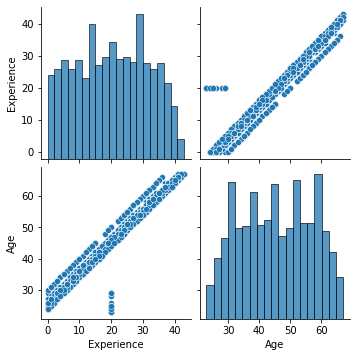

In [40]:
sns.pairplot(df_test1, vars=["Experience", "Age"])

In [41]:
df_test1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<AxesSubplot:xlabel='Education', ylabel='Income'>

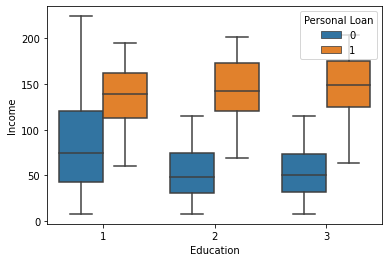

In [42]:
#Although, the undergraduates are earning more than the graduates and post-graduates, 
#but the interest towards personal loan is same in all education levels.
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df_loan)

<AxesSubplot:xlabel='Family', ylabel='Income'>

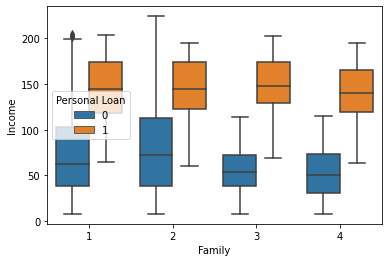

In [43]:
#Although, its hard to analyze anything based on the family size, but the income of the family with one is more compared to rest.
#There is no particular pattern in case of personal loan based on family size but 
#family with income less than 100k are less likely to take loan
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df_loan)

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

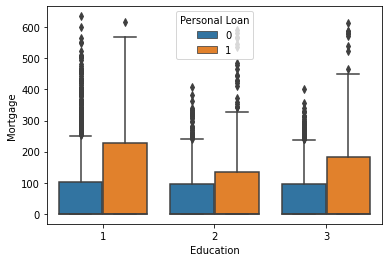

In [44]:
#Mortgage for undergraduates is more compared to rest of the groups.There is no particular inference in case of personal loan.
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df_loan)

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

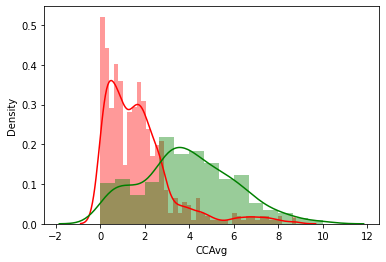

In [45]:
#The distribution for Credit card expenditure per month in case of depositors has a gaussian distribution as compared to liability customers.
sns.distplot(df_loan[df_loan['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(df_loan[df_loan['Personal Loan'] == 1]['CCAvg'], color = 'g')

<AxesSubplot:xlabel='CreditCard', ylabel='CCAvg'>

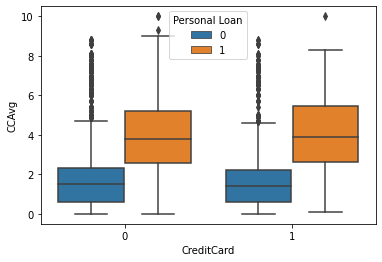

In [46]:
#The customers with no credit card have slightly more chances of opting for personal loan.
#Also, customers with credit card who have high avg spending per month , have more chances of opting persona loan.
sns.boxplot(x='CreditCard',y='CCAvg',hue='Personal Loan',data=df_loan)

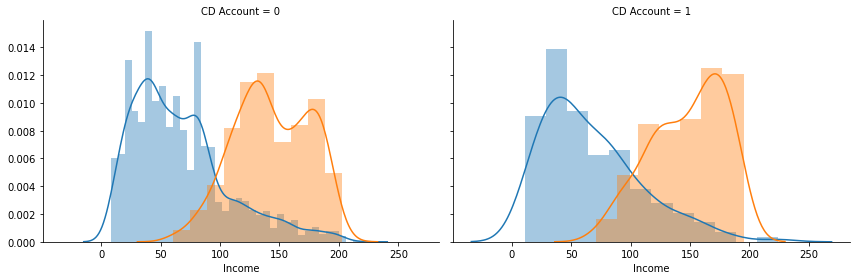

In [47]:
inc_plt = sns.FacetGrid(data=df_loan, col='CD Account', height=4,aspect=1.5,hue='Personal Loan',legend_out=True) 
inc_plt.map(sns.distplot, "Income")

<h3> Get the target column distribution </h3>

In [48]:
y = df_test1['Personal Loan']   #Target column is Personel Loan
df_test1.drop('Personal Loan',axis=1,inplace=True)   #All the independent variables should only be present

In [49]:
df_test1.drop('ID',axis=1,inplace=True)  # ID column doesnt offer insights about the data and does not offer any conclusion about target
df_test1.drop('Experience',axis=1,inplace=True) #Age and Experience are highly correlated, hence either of them should be removed.

In [50]:
X = df_test1.iloc[:,0:11]#X has all the independent variables based on which the predication model is designed.
X

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,1,0


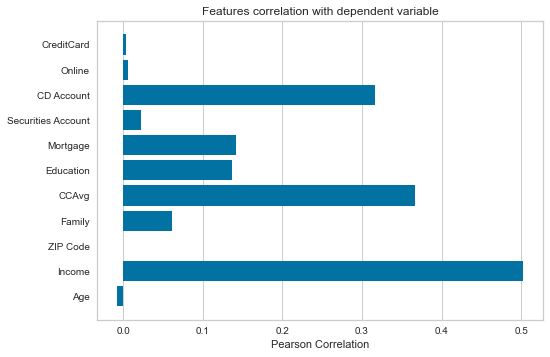

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [51]:
from yellowbrick.target import FeatureCorrelation
feature_names = X.columns

visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()

We can observe that "Income" variable has the highest correlation with the dependent variable "Personal Loan",
whereas "Zip Code" has no correlation with the target variable, so we can also eliminate this column from the input data.

In [52]:
df_test1.drop("ZIP Code",axis=1,inplace=True)

In [53]:
X = df_test1.iloc[:,0:10]
X

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


<h3>Split the data into training and test set in the ratio of 70:30 respectively</h3>

In [54]:
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# smt = SMOTE()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)
#X_test.shape

In [55]:
print("Percent of borrowers in Train split is %3.2f" %(100*y_train.value_counts()[1]/len(y_train)))
print("Percent of borrowers in Test split is %3.2f" %(100*y_test.value_counts()[1]/len(y_test)))

Percent of borrowers in Train split is 9.60
Percent of borrowers in Test split is 9.60


In [56]:
# X_train_smp, Y_train_smp = smt.fit_sample(X_train, y_train)

In [57]:
# print("Percent of borrowers in Train split is %3.2f" %(100*Y_train_smp.value_counts()[1]/len(Y_train_smp)))
# print("Percent of borrowers in Test split is %3.2f" %(100*y_test.value_counts()[1]/len(y_test)))

In [58]:
#Applying normalization to the data in order to remove the outliers from the features in the dataset.
#Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

norm_df_train = pt.fit_transform(X_train)
norm_df_test = pt.transform(X_test)

<h3>Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer 
buying personal loans</h3>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [60]:
#Using GridSearchCV to find the best hyperparamter to improve the model accuracy
C_space = np.logspace(-5,5,18)
param_grid = {"C":C_space,"penalty":["l1","l2"]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(norm_df_train,y_train)
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.5080218046913023, 'penalty': 'l2'}
accuracy : 0.9560000000000001


<h2> Logistic Regression </h2

In [61]:
logreg = LogisticRegression(C=0.5080218046913023, penalty='l2')
logreg.fit(norm_df_train, y_train)
log_pred = logreg.predict(norm_df_test)
print("Training accuracy for Logistic Regression model:")
print(logreg.score(norm_df_train,y_train))
print("Testing accuracy for Logistic Regression model:")
print(logreg.score(norm_df_test,y_test))

Training accuracy for Logistic Regression model:
0.9571428571428572
Testing accuracy for Logistic Regression model:
0.96


In [62]:
print("Testing f1Score", f1_score(y_test,log_pred,average='binary'))

Testing f1Score 0.7674418604651162


In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

[[1341   15]
 [  45   99]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.87      0.69      0.77       144

    accuracy                           0.96      1500
   macro avg       0.92      0.84      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [64]:
#We see 96% accuracy for logistic regression algorithm. But we should also see the recall value here, 
#its low for customers opting for personal loan. We need to reduce the false negative cases here , to increase recall.

In [65]:
#Let's scale the data for better perforamance
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX_train=sc.fit_transform(X_train)
scaledX_test=sc.transform(X_test)

<h2> KNN </h2>

In [66]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# algo=KNeighborsClassifier()
# params = {'n_neighbors' : np.arange(1,40),'weights': ['uniform', 'distance'],'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# grid = GridSearchCV(cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42),estimator=algo, param_grid=params,scoring = 'accuracy',verbose = 1 ) #-1 means using all processors

# grid.fit(scaledX_train, y_train)
# print(grid)

# #Question how to check on test data
# print('\n')
# print("Testing Accuracy ",grid.best_score_)
# print('Best value of k is ',grid.best_estimator_.n_neighbors)
# print('Best weight estimator is ',grid.best_estimator_.weights)
# print('Best algorithm is ',grid.best_estimator_.algorithm)

In [67]:
knn_mod = KNeighborsClassifier(n_neighbors=3)
knn_mod.fit(scaledX_train, y_train)
knn_pred = knn_mod.predict(scaledX_test)
print("Training accuracy for KNN model:")
print(knn_mod.score(scaledX_train,y_train))
print("Testing accuracy for KNN model:")
print(knn_mod.score(scaledX_test,y_test))

Training accuracy for KNN model:
0.9791428571428571
Testing accuracy for KNN model:
0.9633333333333334


In [68]:
print("Testing f1Score", f1_score(y_test,knn_pred,average='binary'))

Testing f1Score 0.7773279352226721


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[1349    7]
 [  48   96]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.93      0.67      0.78       144

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [70]:
#The accuracy is quite good for KNN , where we have also scaled the data for better performance.
#Recall is 67%, which is not a good value as such, so we need to reduce the false negatives(48) in the confusion matrix.

In [71]:
#Lets' find the ideal value of k
neighbors=np.arange(1,40)
train_accuracy_plot=np.empty(len(neighbors))
test_accuracy_plot=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    train=[]
    test=[]        
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    #COMPUTE ACCURACY ON THE TRAINING SET
    train_accuracy_plot[i]=np.mean(train)
    #COMPUTE ACCURACY ON THE Testing SET
    test_accuracy_plot[i]=np.mean(test)

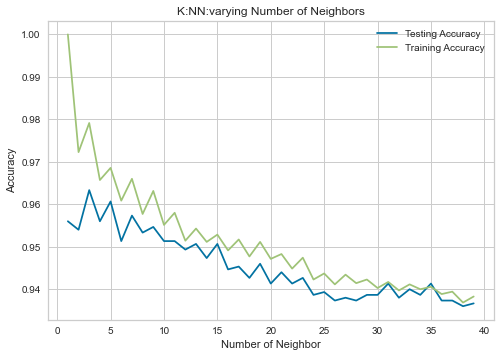

In [72]:
#Generate plot
plt.title('K:NN:varying Number of Neighbors')
plt.plot(neighbors,test_accuracy_plot,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy_plot,label='Training Accuracy')
plt.legend()
plt.xlabel("Number of Neighbor")
plt.ylabel("Accuracy")
plt.show()

In [73]:
# We can see that for k=3, we have the training accuracy and testing accuracy coincide each other.

<h2> Naïve Bayes </h2>

In [74]:
naive_mod = GaussianNB()
naive_mod.fit(norm_df_train,y_train)
pred_naive = naive_mod.predict(norm_df_test)
print("Training accuracy for Naive Bayes model:")
print(naive_mod.score(norm_df_train,y_train))
print("Testing accuracy for Naive Bayes model:")
print(naive_mod.score(norm_df_test,y_test))

Training accuracy for Naive Bayes model:
0.9285714285714286
Testing accuracy for Naive Bayes model:
0.926


In [75]:
print("Testing f1Score", f1_score(y_test,pred_naive,average='binary'))

Testing f1Score 0.5714285714285714


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred_naive))
print(classification_report(y_test, pred_naive))

[[1315   41]
 [  70   74]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1356
           1       0.64      0.51      0.57       144

    accuracy                           0.93      1500
   macro avg       0.80      0.74      0.77      1500
weighted avg       0.92      0.93      0.92      1500



In [77]:
#The accuracy is less compared to rest of the algorithm. Naive Bayes assumes the variables are independent to each other, 
#but there will be slight correlation between variables that cannot be ignored.

<h3>Print the confusion matrix for all the above models</h3>

In [78]:
print("------------------Confusion matrix for Logistic Regression--------------------------------------------------------")
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))
print("------------------Confusion matrix for KNN------------------------------------------------------------------------")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print("------------------Confusion matrix for Naive Bayes-----------------------------------------------------------------")
print(confusion_matrix(y_test, pred_naive))
print(classification_report(y_test, pred_naive))

------------------Confusion matrix for Logistic Regression--------------------------------------------------------
[[1341   15]
 [  45   99]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.87      0.69      0.77       144

    accuracy                           0.96      1500
   macro avg       0.92      0.84      0.87      1500
weighted avg       0.96      0.96      0.96      1500

------------------Confusion matrix for KNN------------------------------------------------------------------------
[[1349    7]
 [  48   96]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.93      0.67      0.78       144

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500

------------------Confusion matrix for Naive Bayes------------

<h3> Give your reasoning on which is the best model in this case and why it performs better? </h3>

The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. 
The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that is correct predictions is not that much acceptable.
The Naive Bayes giving the accuracy less in comaprision to other models meaning the probability of determing the target correctly is less.

LR: 0.762319 (0.108726)
KNN: 0.735088 (0.082471)
NB: 0.509397 (0.115878)


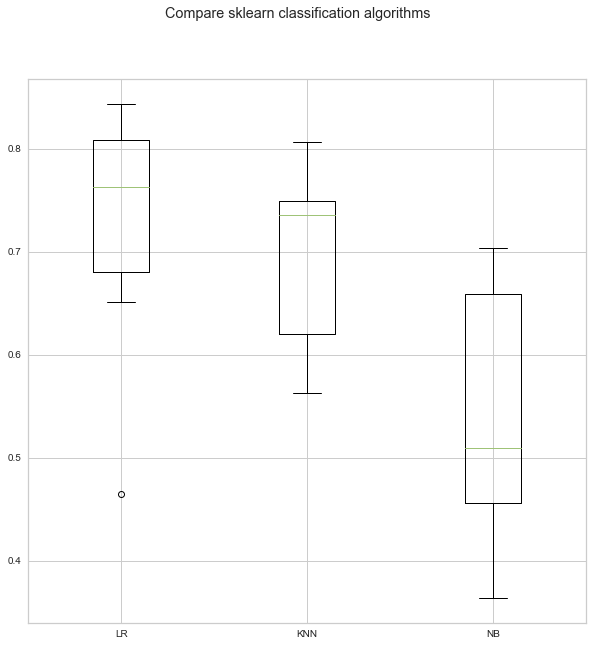

In [79]:
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results = model_selection.cross_val_score(model, norm_df_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
    print(msg)
fig = plt.figure(figsize=(10,10))
fig.suptitle('Compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

The F1 score is best for Logistic Regression which is used when the False Negatives and False Positives are crucial. 
From the above plot, we can clearly see the the performance of LR is far better than the other 2 models.
Naive Bayes is slightly better than KNN as its takes the probability of the customer opting to Personal into consideration,
assuming all variables are independent of each other.
KNN, which uses distance based algorithm,has a better accuracy, but is not reliable and the F1-score shows least value for KNN.

In [82]:
import dill as pickle
filename1 = 'loan_pred.pk'

with open(filename1, 'wb') as file:
	pickle.dump(logreg, file)

In [88]:
with open(filename1 ,'rb') as f:
    loaded_model = pickle.load(f)
    
y_pred_new = loaded_model.predict(X_test)

In [90]:
np.where(y_pred_new==0)

(array([], dtype=int64),)

In [86]:
import numpy as np
test_data = [25,50,4,2,1,0,1,0,0,1]
#convert test_data into numpy array
test_data = np.array(test_data)
#reshape
test_data = test_data.reshape(1,-1)
print(test_data)

[[25 50  4  2  1  0  1  0  0  1]]


In [87]:
prediction = loaded_model.predict(test_data)
print(prediction)

[1]
